# Bonn von 2016-2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df_2016 = pd.read_csv('df_Bonn2016_.csv', index_col='Datetime', parse_dates=True)
df_2017 = pd.read_csv('df_Bonn2017_.csv', index_col='Datetime', parse_dates=True)
df_2018 = pd.read_csv('df_Bonn2018_.csv', index_col='Datetime', parse_dates=True)
bonn2016_tag = df_2016['Bonn2016'].resample('D').sum()
bonn2017_tag = df_2017['Bonn2017'].resample('D').sum()
bonn2018_tag = df_2018['Bonn2018'].resample('D').sum()

bonn2022_tag = pd.read_csv('Bonn2022_täglich.csv', index_col='Datum/Uhrzeit', parse_dates=True)['0']
bonn2021_tag = pd.read_csv('Bonn2021_täglich.csv', index_col='Time', parse_dates=True)['0']
bonn2020_tag = pd.read_csv('Bonn2020_täglich.csv', index_col='Time', parse_dates=True)['0']
bonn2019_tag = pd.read_csv('Bonn2019_täglich.csv', index_col='Time', parse_dates=True)['0']

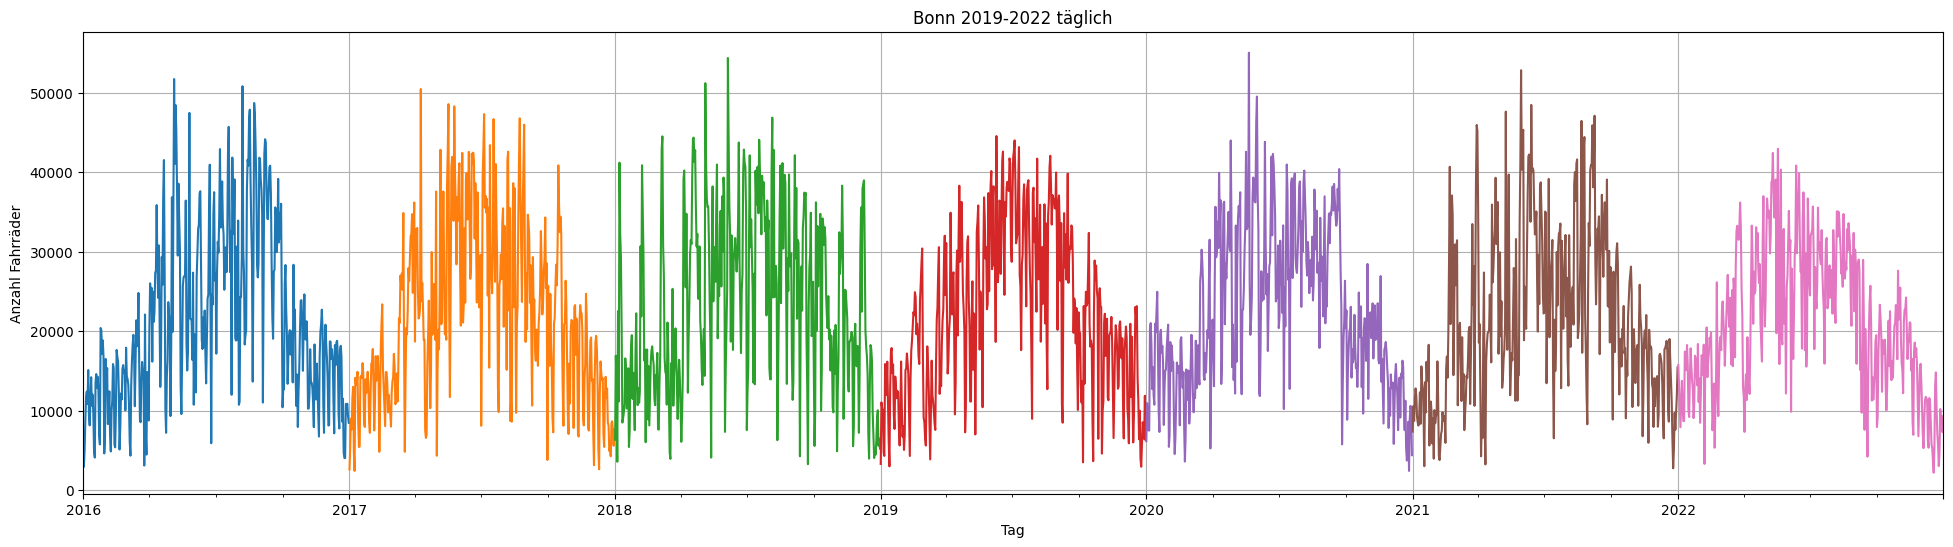

In [3]:
#Bonn täglich für die Jahre 2019-2022
plt.figure(figsize=(24,6))

bonn2016_tag.plot()
bonn2017_tag.plot()
bonn2018_tag.plot()
bonn2019_tag.plot()
bonn2020_tag.plot()
bonn2021_tag.plot()
bonn2022_tag.plot()

plt.title('Bonn 2019-2022 täglich')
plt.ylabel('Anzahl Fahrräder')
plt.xlabel('Tag')
plt.grid()
plt.show()

## Ausgleichsfunktionen finden

### Erste Beobachtung: Die Daten eines Jahres gleichen einer quadratischen Funktion

In [4]:
def quad_ausgleich (x, y):
    """
    Quadratische Regression der Messwerte mit scikit-learn
    
    Parameter: x (array-like) - die Indices also das Datetime-Intervall
               y (array-like) - die Messwete
    
    Returns: die y-Werte der Ausgleichsfunktion als array
    """
    poly = PolynomialFeatures(degree=2)
    x_quad = poly.fit_transform(x.to_julian_date().values.reshape(-1, 1))

    model = LinearRegression()
    model.fit(x_quad, y)
    coefs = model.coef_
    intercept = model.intercept_

    x_values = x.to_julian_date().values
    print(coefs[2], "x^2 + (", coefs[1], ")x + (", intercept, ")")
    return coefs[2] * x_values**2 + coefs[1] * x_values + intercept

-0.692735755816102 x^2 + ( 3404910.8251272636 )x + ( -4183924948672.863 )


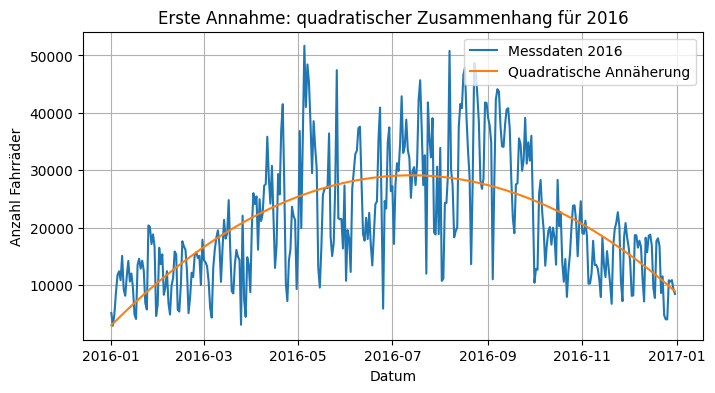

In [5]:
#Erster Plot für 2016
x_werte_2016 = bonn2016_tag.index
y_werte_2016 = bonn2016_tag.values

quad_ausgleich_2016 = quad_ausgleich(x_werte_2016, y_werte_2016)

plt.figure(figsize=(8, 4))

plt.plot(x_werte_2016, y_werte_2016, label="Messdaten 2016")
plt.plot(x_werte_2016, quad_ausgleich_2016, label="Quadratische Annäherung")

plt.title("Erste Annahme: quadratischer Zusammenhang für 2016")
plt.xlabel("Datum")
plt.ylabel("Anzahl Fahrräder")
plt.grid()
plt.legend()
plt.show()


In [6]:
#Berechnung der quadratischen Ausgleichsfunktionen für die restlichen Jahre
x_werte_2017 = bonn2017_tag.index
y_werte_2017 = bonn2017_tag.values
quad_ausgleich_2017 = quad_ausgleich(x_werte_2017, y_werte_2017)

x_werte_2018 = bonn2018_tag.index
y_werte_2018 = bonn2018_tag.values
quad_ausgleich_2018 = quad_ausgleich(x_werte_2018, y_werte_2018)

x_werte_2019 = bonn2019_tag.index
y_werte_2019 = bonn2019_tag.values
quad_ausgleich_2019 = quad_ausgleich(x_werte_2019, y_werte_2019)

x_werte_2020 = bonn2020_tag.index
y_werte_2020 = bonn2020_tag.values
quad_ausgleich_2020 = quad_ausgleich(x_werte_2020, y_werte_2020)

x_werte_2021 = bonn2021_tag.index
y_werte_2021 = bonn2021_tag.values
quad_ausgleich_2021 = quad_ausgleich(x_werte_2021, y_werte_2021)

x_werte_2022 = bonn2022_tag.index
y_werte_2022 = bonn2022_tag.values
quad_ausgleich_2022 = quad_ausgleich(x_werte_2022, y_werte_2022)

-0.740603678394109 x^2 + ( 3640715.8114375565 )x + ( -4474326794887.517 )
-0.5634931800886989 x^2 + ( 2770477.834597502 )x + ( -3405341731085.3667 )
-0.7212469973601401 x^2 + ( 3546619.5909260903 )x + ( -4359987106272.185 )
-0.6939811687916517 x^2 + ( 3413044.553562982 )x + ( -4196393780064.523 )
-0.6421080897562206 x^2 + ( 3158407.2919495488 )x + ( -3883900820943.372 )
-0.6357214357703924 x^2 + ( 3127434.966067639 )x + ( -3846358186559.027 )


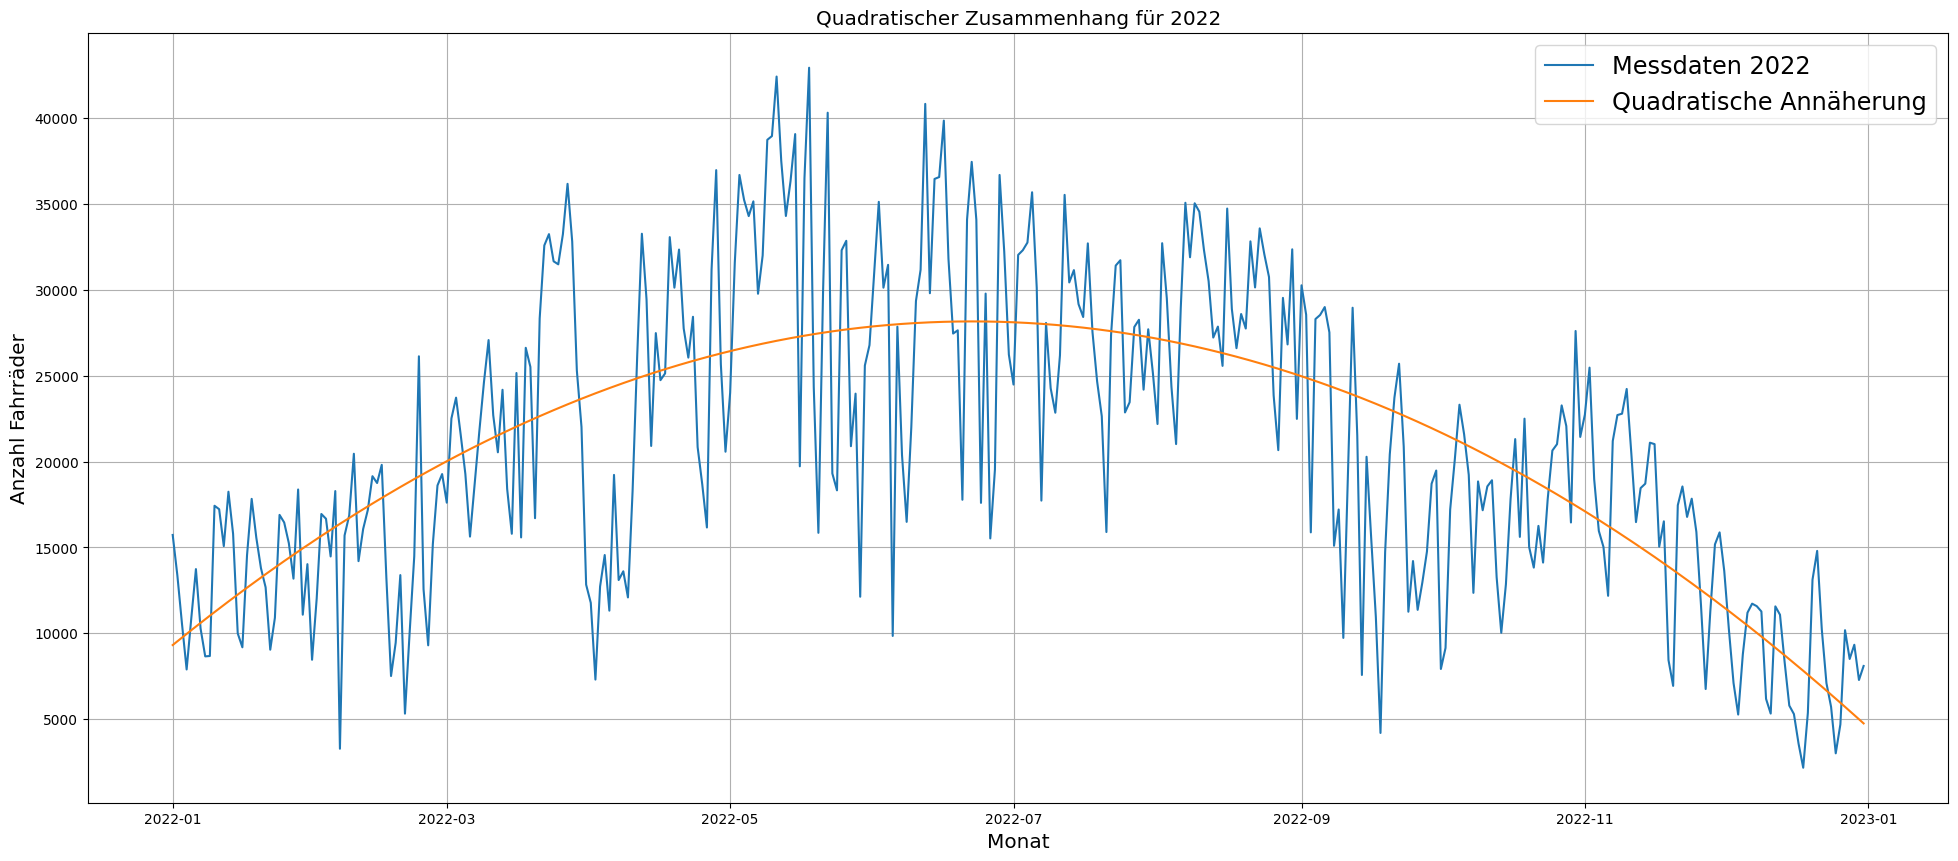

In [7]:
#Plot für 2022
plt.figure(figsize=(24, 10))

plt.plot(x_werte_2022, y_werte_2022, label="Messdaten 2022")
plt.plot(x_werte_2022, quad_ausgleich_2022, label="Quadratische Annäherung")

plt.title("Quadratischer Zusammenhang für 2022", fontsize='x-large')
plt.xlabel("Monat", fontsize='x-large')
plt.ylabel("Anzahl Fahrräder", fontsize='x-large')
plt.grid()
plt.legend(fontsize='xx-large')
plt.savefig('ausgleich2022_plot.jpg', format='jpg')
plt.show()

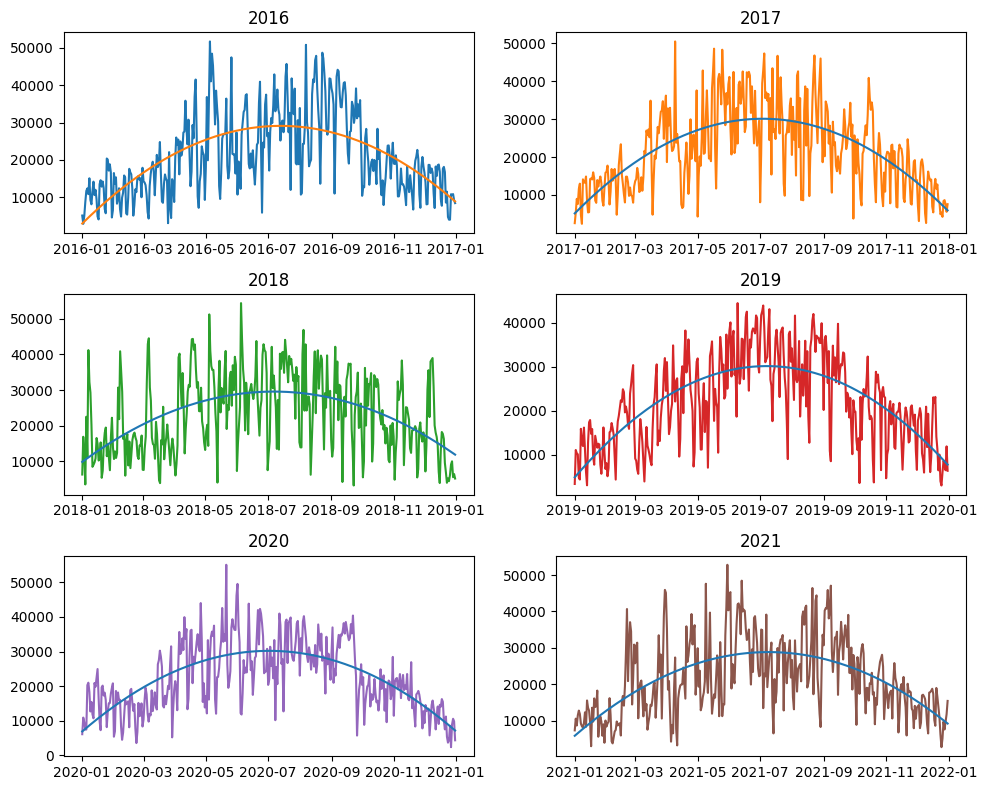

In [8]:
#Plots für die restlichen Jahre
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
axs[0, 0].plot(x_werte_2016, y_werte_2016)
axs[0, 0].plot(x_werte_2016, quad_ausgleich_2016)
axs[0, 0].set_title("2016")

axs[0, 1].plot(x_werte_2017, y_werte_2017, color='tab:orange')
axs[0, 1].plot(x_werte_2017, quad_ausgleich_2017)
axs[0, 1].set_title("2017")

axs[1, 0].plot(x_werte_2018, y_werte_2018, color='tab:green')
axs[1, 0].plot(x_werte_2018, quad_ausgleich_2018)
axs[1, 0].set_title("2018")

axs[1, 1].plot(x_werte_2019, y_werte_2019, color='tab:red')
axs[1, 1].plot(x_werte_2019, quad_ausgleich_2019)
axs[1, 1].set_title("2019")

axs[2, 0].plot(x_werte_2020, y_werte_2020, color='tab:purple')
axs[2, 0].plot(x_werte_2020, quad_ausgleich_2020)
axs[2, 0].set_title("2020")

axs[2, 1].plot(x_werte_2021, y_werte_2021, color='tab:brown')
axs[2, 1].plot(x_werte_2021, quad_ausgleich_2021)
axs[2, 1].set_title("2021")

plt.tight_layout()
plt.show()

### Zweite Annahme: Die Messdaten über die Jahre hinweg gleichen einer Sinuskurve

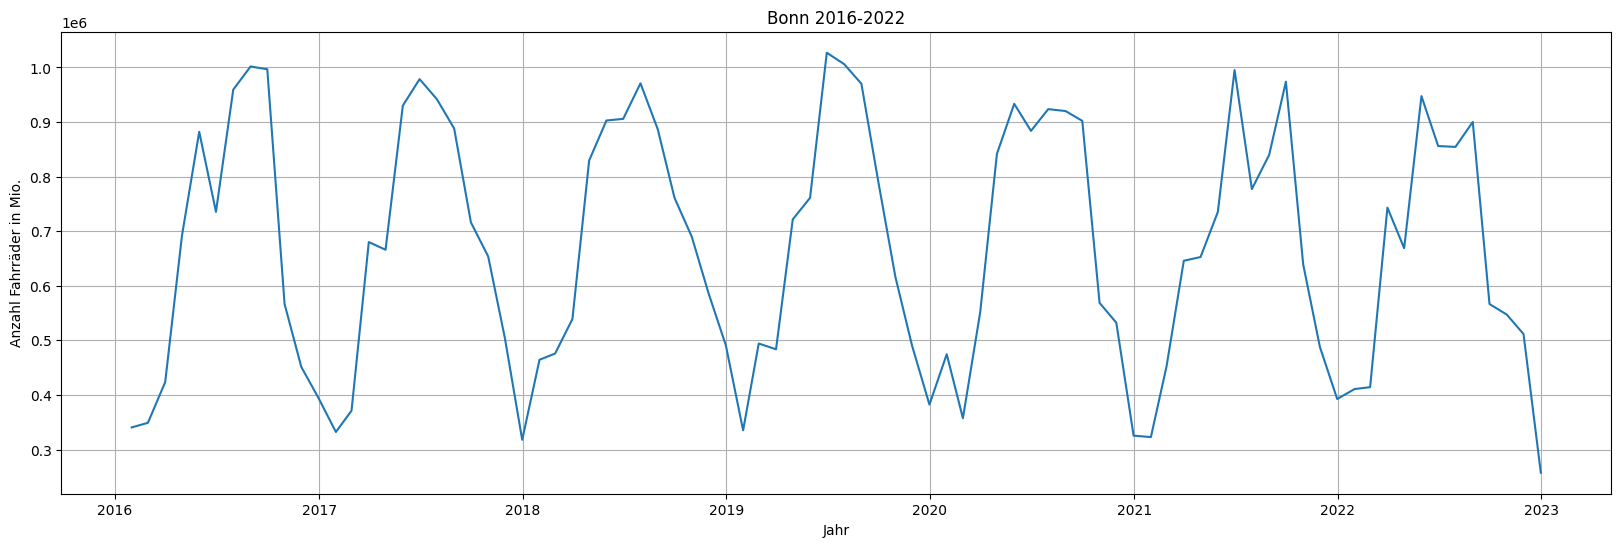

In [9]:
bonn_komplett = pd.concat([bonn2016_tag, bonn2017_tag, bonn2018_tag, bonn2019_tag, bonn2020_tag, bonn2021_tag, bonn2022_tag])
bonn_komplett = bonn_komplett.sort_index()
bonn_komplett_monat = bonn_komplett.resample('M').sum()

x_werte_bonn = bonn_komplett_monat.index
y_werte_bonn = bonn_komplett_monat.values

plt.figure(figsize=(20, 6))
plt.plot(x_werte_bonn, y_werte_bonn)
plt.title("Bonn 2016-2022")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Fahrräder in Mio.")
plt.grid()
plt.show()

In [10]:
# Zweite Annahme: sinusförmiger Zusammenhang
def sinus_funktion(x, A, B, C, D):
    """
    Berechnung der Funktionswerte einer Sinusfunktion
    
    Parameter: x (array-like) - die Indices also das Datetime-Intervall
               A              - die berechnete oder geschätzte Amplitude
               B              - die berechnete oder geschätzte Frequenz
               C              - die berechnete oder geschätzte Phasenverschiebung
               D              - die berechnete oder geschätzte x-Achsenverschiebung
    
    Returns: die Funktionswerte als array
    """
    print(A, "sin (", B,"x +", C,") +", D)
    return A * np.sin(B * (x + C)) + D

#Geschätzte Parameter
amplitude = (np.max(y_werte_bonn) - np.min(y_werte_bonn)) / 2
frequenz = 2 * (np.pi)
phase = (3 / 2) * (np.pi)
verschiebung = np.mean(y_werte_bonn)

384697.5 sin ( 6.283185307179586 x + 4.71238898038469 ) + 668600.2023809524


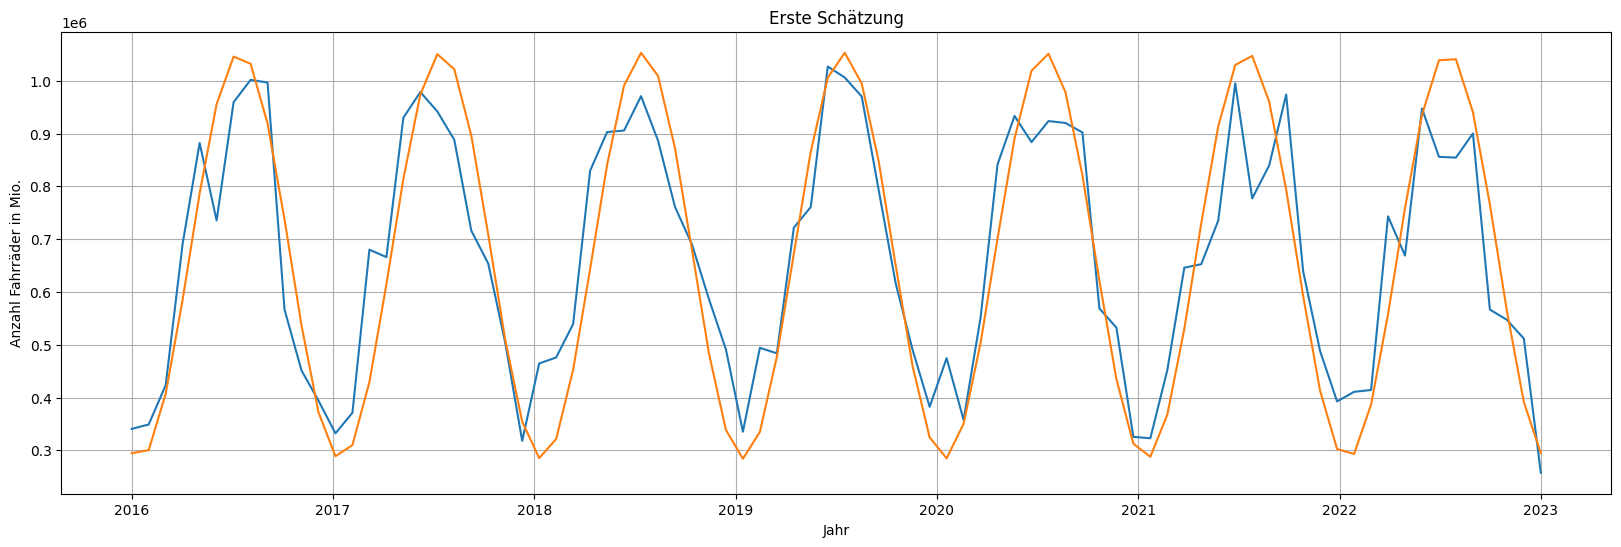

In [11]:
x = np.linspace(0, 7, 84)
sinus_bonn = sinus_funktion(x, amplitude, frequenz, phase, verschiebung)

plt.figure(figsize=(20, 6))
plt.plot(x, y_werte_bonn, label='Messwerte monatlich')
plt.plot(x, sinus_bonn, label='Geschätzte Sinuskurve')
plt.title("Erste Schätzung")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Fahrräder in Mio.")
custom_ticks = [0, 1, 2, 3, 4, 5, 6, 7]
custom_labels = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
plt.xticks(custom_ticks, custom_labels)
plt.grid()
plt.show()

26420.0 sin ( 6.283185307179586 x + 4.71238898038469 ) + 21964.18341806805
11464.9458 sin ( 6.283185307179586 x + 4.71238898038469 ) + 21964.18341806805


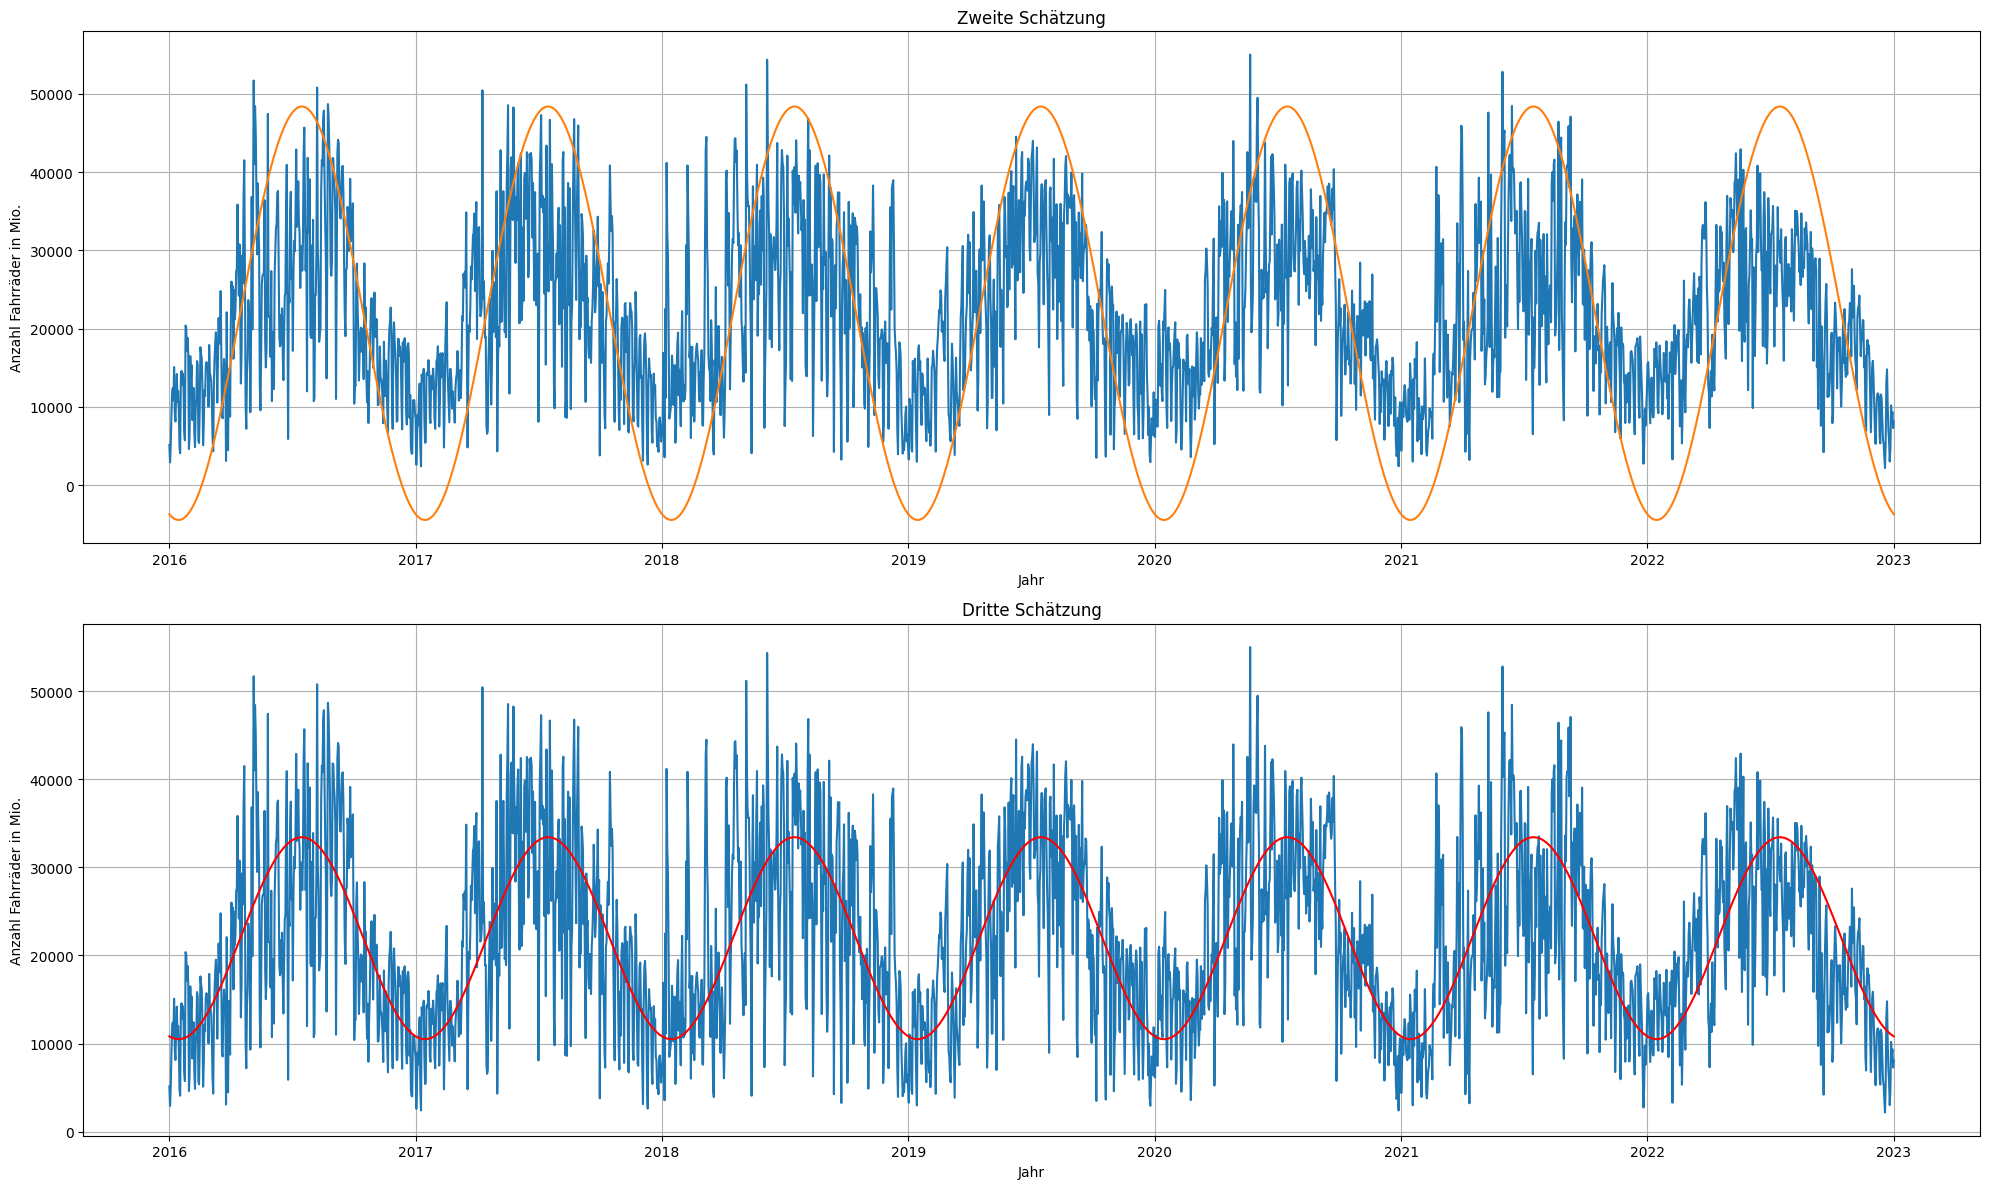

In [12]:
#Verfeinerung
amplitude2 = (np.max(bonn_komplett.values) - np.min(bonn_komplett.values)) / 2
frequenz = 2 * (np.pi)
phase = 1.5 * (np.pi)
verschiebung2 = np.mean(bonn_komplett.values)
x2 = np.linspace(0, 7, len(bonn_komplett))
sinus2_bonn = sinus_funktion(x2, amplitude2, frequenz, phase, verschiebung2)

plt.figure(figsize=(20, 12))
plt.subplot(211)
plt.plot(x2, bonn_komplett.values)
plt.plot(x2, sinus2_bonn)
plt.title("Zweite Schätzung")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Fahrräder in Mio.")
custom_ticks = [0, 1, 2, 3, 4, 5, 6, 7]
custom_labels = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
plt.xticks(custom_ticks, custom_labels)
plt.grid()

#robustere Schätzung der Amplitude
amplitude3 = 1.4826 * (np.median(np.abs(bonn_komplett.values - np.median(bonn_komplett.values))))
sinus3_bonn = sinus_funktion(x2, amplitude3, frequenz, phase, verschiebung2)

plt.subplot(212)
plt.plot(x2, bonn_komplett.values)
plt.plot(x2, sinus3_bonn, c='r')
plt.title("Dritte Schätzung")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Fahrräder in Mio.")
custom_ticks = [0, 1, 2, 3, 4, 5, 6, 7]
custom_labels = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
plt.xticks(custom_ticks, custom_labels)
plt.tight_layout()
plt.grid()
plt.savefig('ausgleich2016-2022_plot.jpg', format='jpg')
plt.show()